In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://glycemic-index.net/glycemic-index-of-baked-products/'

In [3]:
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text, 'html')

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
  <link as="image" href="/wp-content/uploads/2023/02/mobile_banner.webp" rel="preload"/>
  <!-- This site is optimized with the Yoast SEO plugin v21.7 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   Glycemic Index of Baked Products - Complete Chart - Glycemic Index Guide
  </title>
  <meta content="Baked products such as breads, cakes and pastries generally have higher glycemic indices than other foods because they contain large amounts of refined..." name="description"/>
  <link href="https://glycemic-index.net/glycemic-index-of-baked-products/" rel="canonical"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="article" property="og:type"/>
  <meta content

In [7]:
table = soup.find_all('table', class_="tftable")[0]

In [8]:
table

<table border="1" class="tftable">
<tr><th>Photo</th><th width="55%">Name</th><th>GI</th><th>GL</th></tr>
<tr><td><a href="https://glycemic-index.net/baguette-white/"><img alt="Baguette (white)" decoding="async" height="40" src="https://glycemic-index.net/images/km3qgnoJUj_small.webp" width="40"/>
</a></td><td><a href="https://glycemic-index.net/baguette-white/">Baguette (white)</a></td><td><a href="https://glycemic-index.net/baguette-white/">95</a></td><td><a href="https://glycemic-index.net/baguette-white/">46.5</a></td></tr>
<tr><td><a href="https://glycemic-index.net/baguette-whole-grain/"><img alt="Baguette (whole grain)" decoding="async" height="40" src="https://glycemic-index.net/images/a9QuVsuUee_small.webp" width="40"/>
</a></td><td><a href="https://glycemic-index.net/baguette-whole-grain/">Baguette (whole grain)</a></td><td><a href="https://glycemic-index.net/baguette-whole-grain/">73</a></td><td><a href="https://glycemic-index.net/baguette-whole-grain/">28.3</a></td></tr>
<t

In [9]:
table_headers = table.find_all('th')

In [10]:
table_headers

[<th>Photo</th>, <th width="55%">Name</th>, <th>GI</th>, <th>GL</th>]

In [11]:
table_headers = [title.text.strip() for title in table_headers]

In [12]:
table_headers

['Photo', 'Name', 'GI', 'GL']

In [13]:
df_baked_products = pd.DataFrame(columns = table_headers) #dataframe

In [14]:
column_data = table.find_all('tr')

In [15]:
def GI_level(GI):
    if 0 <= GI <= 55:
        return "Low"
    elif 56 <= GI <= 59:
        return "Moderate"
    else:
        return "High"

In [16]:
def GL_level(GL):
    if 0 <= GL <= 10:
        return "Low"
    elif 11 <= GL <= 19:
        return "Moderate"
    else:
        return "High"

In [17]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_baked_products)
    df_baked_products.loc[lenght] = individual_row_data 
    print(df_baked_products) 
df_baked_products=df_baked_products.drop('Photo', axis=1)
df_baked_products['GI'] = df_baked_products['GI'].astype(int)
df_baked_products['GL'] = df_baked_products['GL'].astype(float)
df_baked_products["GI by level"] = df_baked_products["GI"].apply(GI_level)
df_baked_products["GL by level"] = df_baked_products["GL"].apply(GL_level)
df_baked_products["Category"]="Baked products"

  Photo              Name  GI    GL
0        Baguette (white)  95  46.5
  Photo                    Name  GI    GL
0              Baguette (white)  95  46.5
1        Baguette (whole grain)  73  28.3
  Photo                    Name  GI    GL
0              Baguette (white)  95  46.5
1        Baguette (whole grain)  73  28.3
2                 Bagel (wheat)  70  35.4
  Photo                    Name  GI    GL
0              Baguette (white)  95  46.5
1        Baguette (whole grain)  73  28.3
2                 Bagel (wheat)  70  35.4
3                       Biscuit  70  34.0
  Photo                    Name  GI    GL
0              Baguette (white)  95  46.5
1        Baguette (whole grain)  73  28.3
2                 Bagel (wheat)  70  35.4
3                       Biscuit  70  34.0
4        Biscotti (dry cookies)  70  35.0
  Photo                    Name  GI    GL
0              Baguette (white)  95  46.5
1        Baguette (whole grain)  73  28.3
2                 Bagel (wheat)  70  35.4
3   

In [18]:
df_baked_products

,Name,GI,GL,GI by level,GL by level,Category
0,Baguette (white),95,46.5,High,High,Baked products
1,Baguette (whole grain),73,28.3,High,High,Baked products
2,Bagel (wheat),70,35.4,High,High,Baked products
3,Biscuit,70,34.0,High,High,Baked products
4,Biscotti (dry cookies),70,35.0,High,High,Baked products
5,Pancakes,66,16.6,High,Moderate,Baked products
6,Buckwheat pancakes,40,3.6,Low,Low,Baked products
7,Brioche (bun),70,32.9,High,High,Baked products
8,Bagels,70,48.1,High,High,Baked products
9,Hamburger bun,61,30.1,High,High,Baked products


In [19]:
url = 'https://glycemic-index.net/glycemic-index-of-beverages/'

In [20]:
page=requests.get(url)
page

<Response [200]>

In [21]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_beverages = pd.DataFrame(columns = table_headers)
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_beverages)#dataframe
    df_beverages.loc[lenght] = individual_row_data#dataframe
    print(df_beverages)#dataframe
df_beverages=df_beverages.drop('Photo', axis=1)
df_beverages['GI'] = df_beverages['GI'].astype(int)
df_beverages['GL'] = df_beverages['GL'].astype(float)
df_beverages["GI by level"] = df_beverages["GI"].apply(GI_level)
df_beverages["GL by level"] = df_beverages["GL"].apply(GL_level)
df_beverages["Category"]="Beverages"

  Photo           Name  GI    GL
0        Agave (syrup)  15  11.4
  Photo                           Name  GI    GL
0                        Agave (syrup)  15  11.4
1        Pineapple Juice (unsweetened)  50   6.8
  Photo                                            Name  GI    GL
0                                         Agave (syrup)  15  11.4
1                         Pineapple Juice (unsweetened)  50   6.8
2        Orange juice (freshly squeezed and sugar free)  45   4.8
  Photo                                            Name  GI    GL
0                                         Agave (syrup)  15  11.4
1                         Pineapple Juice (unsweetened)  50   6.8
2        Orange juice (freshly squeezed and sugar free)  45   4.8
3                             Grape Juice (unsweetened)  45   6.9
  Photo                                            Name  GI    GL
0                                         Agave (syrup)  15  11.4
1                         Pineapple Juice (unsweetened)  50  

In [22]:
df_beverages

,Name,GI,GL,GI by level,GL by level,Category
0,Agave (syrup),15,11.4,Low,Moderate,Beverages
1,Pineapple Juice (unsweetened),50,6.8,Low,Low,Beverages
2,Orange juice (freshly squeezed and sugar free),45,4.8,Low,Low,Beverages
3,Grape Juice (unsweetened),45,6.9,Low,Low,Beverages
4,Grapefruit juice (unsweetened),45,2.7,Low,Low,Beverages
5,Coffee beans,50,0.1,Low,Low,Beverages
6,Cocoa Powder (Sugar Free),20,4.4,Low,Low,Beverages
7,Cranberry Juice (unsweetened),50,7.3,Low,Low,Beverages
8,Lemon juice (unsweetened),20,0.6,Low,Low,Beverages
9,Carrot Juice (unsweetened),40,2.6,Low,Low,Beverages


In [23]:
url = 'https://glycemic-index.net/glycemic-index-of-dairy-foods/'
page=requests.get(url)
page

<Response [200]>

In [24]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_diary = pd.DataFrame(columns = table_headers)
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data] 
    lenght = len(df_diary)                        #dataframe
    df_diary.loc[lenght] = individual_row_data    #dataframe
    print(df_diary)                               #dataframe
df_diary=df_diary.drop('Photo', axis=1)
df_diary['GI'] = df_diary['GI'].astype(int)
df_diary['GL'] = df_diary['GL'].astype(float)
df_diary["GI by level"] = df_diary["GI"].apply(GI_level)
df_diary["GL by level"] = df_diary["GL"].apply(GL_level)
df_diary["Category"]="Dairy foods"

  Photo                                     Name  GI    GL
0        Vanilla ice cream (regular, with sugar)  60  14.4
  Photo                                     Name  GI    GL
0        Vanilla ice cream (regular, with sugar)  60  14.4
1                                         Yogurt  35   1.6
  Photo                                     Name  GI    GL
0        Vanilla ice cream (regular, with sugar)  60  14.4
1                                         Yogurt  35   1.6
2                            Yogurt 1.5% natural  35   0.5
  Photo                                     Name  GI    GL
0        Vanilla ice cream (regular, with sugar)  60  14.4
1                                         Yogurt  35   1.6
2                            Yogurt 1.5% natural  35   0.5
3                                   Sweet yogurt  52   4.7
  Photo                                     Name  GI    GL
0        Vanilla ice cream (regular, with sugar)  60  14.4
1                                         Yogurt  35   1

In [25]:
df_diary

,Name,GI,GL,GI by level,GL by level,Category
0,"Vanilla ice cream (regular, with sugar)",60,14.4,High,Moderate,Dairy foods
1,Yogurt,35,1.6,Low,Low,Dairy foods
2,Yogurt 1.5% natural,35,0.5,Low,Low,Dairy foods
3,Sweet yogurt,52,4.7,Low,Low,Dairy foods
4,Soy yogurt (natural),20,1.6,Low,Low,Dairy foods
5,Fruit yogurt,52,1.5,Low,Low,Dairy foods
6,Fat-free yogurt,33,2.5,Low,Low,Dairy foods
7,Kefir (1% fat),31,1.2,Low,Low,Dairy foods
8,Kefir (regular),36,1.4,Low,Low,Dairy foods
9,Kefir low-fat,25,0.0,Low,Low,Dairy foods


In [26]:
url = 'https://glycemic-index.net/glycemic-index-of-fast-foods/'
page=requests.get(url)
page

<Response [200]>

In [27]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_fastfood = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_fastfood)                        #dataframe
    df_fastfood.loc[lenght] = individual_row_data    #dataframe
    print(df_fastfood)                               #dataframe
df_fastfood=df_fastfood.drop('Photo', axis=1)
df_fastfood['GI'] = df_fastfood['GI'].astype(int)
df_fastfood['GL'] = df_fastfood['GL'].astype(float)
df_fastfood["GI by level"] = df_fastfood["GI"].apply(GI_level)
df_fastfood["GL by level"] = df_fastfood["GL"].apply(GL_level)
df_fastfood["Category"]="Fast foods"

  Photo       Name  GI   GL
0        Hamburger  66  1.3
  Photo              Name  GI    GL
0               Hamburger  66   1.3
1        Instant potatoes  87  66.1
  Photo              Name  GI    GL
0               Hamburger  66   1.3
1        Instant potatoes  87  66.1
2            Potato chips  70  37.0
  Photo              Name  GI    GL
0               Hamburger  66   1.3
1        Instant potatoes  87  66.1
2            Potato chips  70  37.0
3            French fries  75  22.6
  Photo              Name  GI    GL
0               Hamburger  66   1.3
1        Instant potatoes  87  66.1
2            Potato chips  70  37.0
3            French fries  75  22.6
4         Chinese noodles  35  23.4
  Photo              Name  GI    GL
0               Hamburger  66   1.3
1        Instant potatoes  87  66.1
2            Potato chips  70  37.0
3            French fries  75  22.6
4         Chinese noodles  35  23.4
5              Corn chips  63  28.8
  Photo              Name  GI    GL
0       

In [28]:
df_fastfood

,Name,GI,GL,GI by level,GL by level,Category
0,Hamburger,66,1.3,High,Low,Fast foods
1,Instant potatoes,87,66.1,High,High,Fast foods
2,Potato chips,70,37.0,High,High,Fast foods
3,French fries,75,22.6,High,High,Fast foods
4,Chinese noodles,35,23.4,Low,High,Fast foods
5,Corn chips,63,28.8,High,High,Fast foods
6,Instant noodles,52,29.5,Low,High,Fast foods
7,Popcorn,55,40.7,Low,High,Fast foods
8,"Chips, corn, salted",42,25.6,Low,High,Fast foods


In [29]:
url = 'https://glycemic-index.net/glycemic-index-of-fruits/'
page=requests.get(url)
page

<Response [200]>

In [30]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_fruits = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_fruits)                        #dataframe
    df_fruits.loc[lenght] = individual_row_data    #dataframe
    print(df_fruits)                               #dataframe
df_fruits=df_fruits.drop('Photo', axis=1)
df_fruits['GI'] = df_fruits['GI'].astype(int)
df_fruits['GL'] = df_fruits['GL'].astype(float)
df_fruits["GI by level"] = df_fruits["GI"].apply(GI_level)
df_fruits["GL by level"] = df_fruits["GL"].apply(GL_level)
df_fruits["Category"]="Fruits"

  Photo     Name  GI   GL
0        Apricot  34  3.8
  Photo                        Name  GI    GL
0                           Apricot  34   3.8
1        Apricots (canned in syrup)  60  12.9
  Photo                                   Name  GI    GL
0                                      Apricot  34   3.8
1                   Apricots (canned in syrup)  60  12.9
2        Quince (canned / jelly without sugar)  40   3.8
  Photo                                   Name  GI    GL
0                                      Apricot  34   3.8
1                   Apricots (canned in syrup)  60  12.9
2        Quince (canned / jelly without sugar)  40   3.8
3           Quince (canned / jelly with sugar)  65   7.2
  Photo                                   Name  GI    GL
0                                      Apricot  34   3.8
1                   Apricots (canned in syrup)  60  12.9
2        Quince (canned / jelly without sugar)  40   3.8
3           Quince (canned / jelly with sugar)  65   7.2
4           

In [31]:
df_fruits

,Name,GI,GL,GI by level,GL by level,Category
0,Apricot,34,3.8,Low,Low,Fruits
1,Apricots (canned in syrup),60,12.9,High,Moderate,Fruits
2,Quince (canned / jelly without sugar),40,3.8,Low,Low,Fruits
3,Quince (canned / jelly with sugar),65,7.2,High,Low,Fruits
4,Quince (fresh fruit),35,3.4,Low,Low,Fruits
...,...,...,...,...,...,...
75,Prunes,40,25.6,Low,High,Fruits
76,Dried apples,35,20.6,Low,High,Fruits
77,An Apple,36,5.0,Low,Low,Fruits
78,Applesauce (unsweetened),35,4.0,Low,Low,Fruits


In [32]:
url = 'https://glycemic-index.net/glycemic-index-of-grains/'
page=requests.get(url)
page

<Response [200]>

In [33]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_grains = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_grains)                        #dataframe
    df_grains.loc[lenght] = individual_row_data    #dataframe
    print(df_grains)                               #dataframe
df_grains=df_grains.drop('Photo', axis=1)
df_grains['GI'] = df_grains['GI'].astype(int)
df_grains['GL'] = df_grains['GL'].astype(float)
df_grains["GI by level"] = df_grains["GI"].apply(GI_level)
df_grains["GL by level"] = df_grains["GL"].apply(GL_level)
df_grains["Category"]="Grains"

  Photo                            Name  GI    GL
0        Amaranth (analogue of popcorn)  70  43.4
  Photo                            Name  GI    GL
0        Amaranth (analogue of popcorn)  70  43.4
1           Amaranth seeds (unprepared)  35  19.9
  Photo                                 Name  GI    GL
0             Amaranth (analogue of popcorn)  70  43.4
1                Amaranth seeds (unprepared)  35  19.9
2        White corn, sweet corn, frozen corn  55  10.4
  Photo                                 Name  GI    GL
0             Amaranth (analogue of popcorn)  70  43.4
1                Amaranth seeds (unprepared)  35  19.9
2        White corn, sweet corn, frozen corn  55  10.4
3                                     Bulgur  55  10.2
  Photo                                 Name  GI    GL
0             Amaranth (analogue of popcorn)  70  43.4
1                Amaranth seeds (unprepared)  35  19.9
2        White corn, sweet corn, frozen corn  55  10.4
3                                  

In [34]:
df_grains

,Name,GI,GL,GI by level,GL by level,Category
0,Amaranth (analogue of popcorn),70,43.4,High,High,Grains
1,Amaranth seeds (unprepared),35,19.9,Low,High,Grains
2,"White corn, sweet corn, frozen corn",55,10.4,Low,High,Grains
3,Bulgur,55,10.2,Low,High,Grains
4,Durum wheat vermicelli,35,8.1,Low,Low,Grains
...,...,...,...,...,...,...
99,Fettuccine,32,21.6,Low,High,Grains
100,Whole Grain (Rye),34,19.0,Low,Moderate,Grains
101,Yam,65,18.2,High,Moderate,Grains
102,Barley porridge,70,46.1,High,High,Grains


In [35]:
url = 'https://glycemic-index.net/glycemic-index-of-greens/'
page=requests.get(url)
page

<Response [200]>

In [36]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_greens = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_greens)                        #dataframe
    df_greens.loc[lenght] = individual_row_data    #dataframe
    print(df_greens)                               #dataframe
df_greens=df_greens.drop('Photo', axis=1)
df_greens['GI'] = df_greens['GI'].astype(int)
df_greens['GL'] = df_greens['GL'].astype(float)
df_greens["GI by level"] = df_greens["GI"].apply(GI_level)
df_greens["GL by level"] = df_greens["GL"].apply(GL_level)
df_greens["Category"]="Greens"

  Photo         Name  GI    GL
0        White beans  35  21.4
  Photo                  Name  GI    GL
0                 White beans  35  21.4
1        White beans (boiled)  33   8.3
  Photo                  Name  GI    GL
0                 White beans  35  21.4
1        White beans (boiled)  33   8.3
2                    Soybeans  15   4.5
  Photo                  Name  GI    GL
0                 White beans  35  21.4
1        White beans (boiled)  33   8.3
2                    Soybeans  15   4.5
3           Beans, fava (raw)  40   7.2
  Photo                  Name  GI    GL
0                 White beans  35  21.4
1        White beans (boiled)  33   8.3
2                    Soybeans  15   4.5
3           Beans, fava (raw)  40   7.2
4         Peas (green, fresh)  35   4.5
  Photo                   Name  GI    GL
0                  White beans  35  21.4
1         White beans (boiled)  33   8.3
2                     Soybeans  15   4.5
3            Beans, fava (raw)  40   7.2
4          Pe

In [37]:
df_greens

,Name,GI,GL,GI by level,GL by level,Category
0,White beans,35,21.4,Low,High,Greens
1,White beans (boiled),33,8.3,Low,Low,Greens
2,Soybeans,15,4.5,Low,Low,Greens
3,"Beans, fava (raw)",40,7.2,Low,Low,Greens
4,"Peas (green, fresh)",35,4.5,Low,Low,Greens
5,"Peas (frozen, boiled)",51,4.6,Low,Low,Greens
6,Pea soup,60,3.7,High,Low,Greens
7,Green peas (canned),45,2.9,Low,Low,Greens
8,Green peas,15,1.5,Low,Low,Greens
9,Orache,53,34.0,Low,High,Greens


In [38]:
url = 'https://glycemic-index.net/glycemic-index-of-meats/'
page=requests.get(url)
page

<Response [200]>

In [39]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_meats = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_meats)                        #dataframe
    df_meats.loc[lenght] = individual_row_data    #dataframe
    print(df_meats)                               #dataframe
df_meats=df_meats.drop('Photo', axis=1)
df_meats['GI'] = df_meats['GI'].astype(int)
df_meats['GL'] = df_meats['GL'].astype(float)
df_meats["GI by level"] = df_meats["GI"].apply(GI_level)
df_meats["GL by level"] = df_meats["GL"].apply(GL_level)
df_meats["Category"]="Meats"

  Photo           Name GI   GL
0        Mutton (Lamb)  0  0.0
  Photo           Name GI   GL
0        Mutton (Lamb)  0  0.0
1          Boiled lamb  0  0.0
  Photo             Name  GI   GL
0          Mutton (Lamb)   0  0.0
1            Boiled lamb   0  0.0
2        Beef Stroganoff  56  7.3
  Photo                   Name  GI   GL
0                Mutton (Lamb)   0  0.0
1                  Boiled lamb   0  0.0
2              Beef Stroganoff  56  7.3
3        Ham, sliced, sausages   0  0.0
  Photo                   Name  GI   GL
0                Mutton (Lamb)   0  0.0
1                  Boiled lamb   0  0.0
2              Beef Stroganoff  56  7.3
3        Ham, sliced, sausages   0  0.0
4           Beef (steak, etc.)   0  0.0
  Photo                   Name  GI   GL
0                Mutton (Lamb)   0  0.0
1                  Boiled lamb   0  0.0
2              Beef Stroganoff  56  7.3
3        Ham, sliced, sausages   0  0.0
4           Beef (steak, etc.)   0  0.0
5             Boiled lean bee

In [40]:
df_meats

,Name,GI,GL,GI by level,GL by level,Category
0,Mutton (Lamb),0,0.0,Low,Low,Meats
1,Boiled lamb,0,0.0,Low,Low,Meats
2,Beef Stroganoff,56,7.3,Moderate,Low,Meats
3,"Ham, sliced, sausages",0,0.0,Low,Low,Meats
4,"Beef (steak, etc.)",0,0.0,Low,Low,Meats
5,Boiled lean beef,0,0.0,Low,Low,Meats
6,Boiled beef tongue,0,0.0,Low,Low,Meats
7,Beef brains,0,0.0,Low,Low,Meats
8,Roast beef liver,50,0.0,Low,Low,Meats
9,Goose,0,0.0,Low,Low,Meats


In [41]:
url = 'https://glycemic-index.net/glycemic-index-of-mushrooms/'
page=requests.get(url)
page

<Response [200]>

In [42]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_mushrooms = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_mushrooms)                        #dataframe
    df_mushrooms.loc[lenght] = individual_row_data    #dataframe
    print(df_mushrooms)                               #dataframe
df_mushrooms=df_mushrooms.drop('Photo', axis=1)
df_mushrooms['GI'] = df_mushrooms['GI'].astype(int)
df_mushrooms['GL'] = df_mushrooms['GL'].astype(float)
df_mushrooms["GI by level"] = df_mushrooms["GI"].apply(GI_level)
df_mushrooms["GL by level"] = df_mushrooms["GL"].apply(GL_level)
df_mushrooms["Category"]="Mushrooms"

  Photo       Name  GI   GL
0        Mushrooms  15  0.8
  Photo                Name  GI   GL
0                 Mushrooms  15  0.8
1        Mushrooms (cooked)  36  1.9


In [43]:
df_mushrooms

,Name,GI,GL,GI by level,GL by level,Category
0,Mushrooms,15,0.8,Low,Low,Mushrooms
1,Mushrooms (cooked),36,1.9,Low,Low,Mushrooms


In [44]:
url = 'https://glycemic-index.net/glycemic-index-of-nuts/'
page=requests.get(url)
page

<Response [200]>

In [45]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_nuts = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_nuts)                        #dataframe
    df_nuts.loc[lenght] = individual_row_data    #dataframe
    print(df_nuts)                               #dataframe
df_nuts=df_nuts.drop('Photo', axis=1)
df_nuts['GI'] = df_nuts['GI'].astype(int)
df_nuts['GL'] = df_nuts['GL'].astype(float)
df_nuts["GI by level"] = df_nuts["GI"].apply(GI_level)
df_nuts["GL by level"] = df_nuts["GL"].apply(GL_level)
df_nuts["Category"]="Nuts"

  Photo    Name  GI   GL
0        Peanut  15  2.4
  Photo                   Name  GI   GL
0                       Peanut  15  2.4
1        Peanuts (Dry Roasted)  15  2.3
  Photo                                             Name  GI    GL
0                                                 Peanut  15   2.4
1                                  Peanuts (Dry Roasted)  15   2.3
2        White almond paste / puree (without sweeteners)  35  16.7
  Photo                                             Name  GI    GL
0                                                 Peanut  15   2.4
1                                  Peanuts (Dry Roasted)  15   2.3
2        White almond paste / puree (without sweeteners)  35  16.7
3                                                Walnuts  15   1.1
  Photo                                             Name  GI    GL
0                                                 Peanut  15   2.4
1                                  Peanuts (Dry Roasted)  15   2.3
2        White almond past

In [46]:
df_nuts

,Name,GI,GL,GI by level,GL by level,Category
0,Peanut,15,2.4,Low,Low,Nuts
1,Peanuts (Dry Roasted),15,2.3,Low,Low,Nuts
2,White almond paste / puree (without sweeteners),35,16.7,Low,Moderate,Nuts
3,Walnuts,15,1.1,Low,Low,Nuts
4,Acorns,25,10.3,Low,High,Nuts
5,Chestnut,60,26.5,High,High,Nuts
6,Pine nuts,15,2.9,Low,Low,Nuts
7,Cashew nuts,25,3.1,Low,Low,Nuts
8,Cashew nuts (salted),22,6.6,Low,Low,Nuts
9,Coconut,45,0.8,Low,Low,Nuts


In [47]:
url = 'https://glycemic-index.net/glycemic-index-of-oils-and-sauces/'
page=requests.get(url)
page

<Response [200]>

In [48]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_oils_and_sauces = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_oils_and_sauces)             #dataframe
    df_oils_and_sauces.loc[lenght] = individual_row_data    #dataframe
    print(df_oils_and_sauces)                               #dataframe
df_oils_and_sauces=df_oils_and_sauces.drop('Photo', axis=1)
df_oils_and_sauces['GI'] = df_oils_and_sauces['GI'].astype(int)
df_oils_and_sauces['GL'] = df_oils_and_sauces['GL'].astype(float)
df_oils_and_sauces["GI by level"] = df_oils_and_sauces["GI"].apply(GI_level)
df_oils_and_sauces["GL by level"] = df_oils_and_sauces["GL"].apply(GL_level)
df_oils_and_sauces["Category"]="Oils and sauces"

  Photo                     Name  GI   GL
0        Peanut Oil (Sugar Free)  40  8.6
  Photo                     Name  GI   GL
0        Peanut Oil (Sugar Free)  40  8.6
1                      Goose fat   0  0.0
  Photo                      Name  GI   GL
0         Peanut Oil (Sugar Free)  40  8.6
1                       Goose fat   0  0.0
2        Fat (animal / vegetable)   0  0.0
  Photo                      Name  GI   GL
0         Peanut Oil (Sugar Free)  40  8.6
1                       Goose fat   0  0.0
2        Fat (animal / vegetable)   0  0.0
3              Coconut milk (raw)  40  1.1
  Photo                      Name  GI   GL
0         Peanut Oil (Sugar Free)  40  8.6
1                       Goose fat   0  0.0
2        Fat (animal / vegetable)   0  0.0
3              Coconut milk (raw)  40  1.1
4           Mayonnaise (homemade)   0  0.0
  Photo                      Name  GI   GL
0         Peanut Oil (Sugar Free)  40  8.6
1                       Goose fat   0  0.0
2        Fat (an

In [49]:
df_oils_and_sauces

,Name,GI,GL,GI by level,GL by level,Category
0,Peanut Oil (Sugar Free),40,8.6,Low,Low,Oils and sauces
1,Goose fat,0,0.0,Low,Low,Oils and sauces
2,Fat (animal / vegetable),0,0.0,Low,Low,Oils and sauces
3,Coconut milk (raw),40,1.1,Low,Low,Oils and sauces
4,Mayonnaise (homemade),0,0.0,Low,Low,Oils and sauces
5,Mayonnaise (sweetened),60,0.2,High,Low,Oils and sauces
6,Margarine,0,0.0,Low,Low,Oils and sauces
7,Butter,0,0.0,Low,Low,Oils and sauces
8,Almond oil,25,0.0,Low,Low,Oils and sauces
9,Olive oil,0,0.0,Low,Low,Oils and sauces


In [50]:
url = 'https://glycemic-index.net/glycemic-index-of-seafood/'
page=requests.get(url)
page

<Response [200]>

In [51]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_seafood = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_seafood)             #dataframe
    df_seafood.loc[lenght] = individual_row_data    #dataframe
    print(df_seafood)                            #dataframe
df_seafood=df_seafood.drop('Photo', axis=1)
df_seafood['GI'] = df_seafood['GI'].astype(int)
df_seafood['GL'] = df_seafood['GL'].astype(float)
df_seafood["GI by level"] = df_seafood["GI"].apply(GI_level)
df_seafood["GL by level"] = df_seafood["GL"].apply(GL_level)
df_seafood["Category"]="Seafood"

  Photo        Name GI   GL
0        Red caviar  0  0.0
  Photo                                      Name GI   GL
0                                      Red caviar  0  0.0
1        Seafood (oysters, shrimp, mussels, etc.)  0  0.0
  Photo                                        Name GI   GL
0                                        Red caviar  0  0.0
1          Seafood (oysters, shrimp, mussels, etc.)  0  0.0
2        Crustaceans (lobster, crab, spiny lobster)  5  0.1
  Photo                                        Name GI   GL
0                                        Red caviar  0  0.0
1          Seafood (oysters, shrimp, mussels, etc.)  0  0.0
2        Crustaceans (lobster, crab, spiny lobster)  5  0.1
3                         Fish (salmon, tuna, etc.)  0  0.0
  Photo                                        Name  GI   GL
0                                        Red caviar   0  0.0
1          Seafood (oysters, shrimp, mussels, etc.)   0  0.0
2        Crustaceans (lobster, crab, spiny lobs

In [52]:
df_seafood

,Name,GI,GL,GI by level,GL by level,Category
0,Red caviar,0,0.0,Low,Low,Seafood
1,"Seafood (oysters, shrimp, mussels, etc.)",0,0.0,Low,Low,Seafood
2,"Crustaceans (lobster, crab, spiny lobster)",5,0.1,Low,Low,Seafood
3,"Fish (salmon, tuna, etc.)",0,0.0,Low,Low,Seafood
4,Surimi (minced fish in crab sticks),50,3.4,Low,Low,Seafood


In [53]:
url = 'https://glycemic-index.net/glycemic-index-of-soups/'
page=requests.get(url)
page

<Response [200]>

In [54]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_soups = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_soups)             #dataframe
    df_soups.loc[lenght] = individual_row_data    #dataframe
    print(df_soups)                               #dataframe
df_soups=df_soups.drop('Photo', axis=1)
df_soups['GI'] = df_soups['GI'].astype(int)
df_soups['GL'] = df_soups['GL'].astype(float)
df_soups["GI by level"] = df_soups["GI"].apply(GI_level)
df_soups["GL by level"] = df_soups["GL"].apply(GL_level)
df_soups["Category"]="Soups"

  Photo            Name  GI   GL
0        Vegetable soup  40  2.5
  Photo               Name  GI   GL
0           Vegetable soup  40  2.5
1        Lentil soup puree  44  6.6
  Photo               Name  GI   GL
0           Vegetable soup  40  2.5
1        Lentil soup puree  44  6.6
2           Vegetable soup  60  2.2
  Photo                             Name  GI   GL
0                         Vegetable soup  40  2.5
1                      Lentil soup puree  44  6.6
2                         Vegetable soup  60  2.2
3        Soup with chicken and mushrooms  46  0.7
  Photo                             Name  GI   GL
0                         Vegetable soup  40  2.5
1                      Lentil soup puree  44  6.6
2                         Vegetable soup  60  2.2
3        Soup with chicken and mushrooms  46  0.7
4                            Tomato soup  38  2.7
  Photo                             Name  GI   GL
0                         Vegetable soup  40  2.5
1                      Lentil so

In [55]:
df_soups

,Name,GI,GL,GI by level,GL by level,Category
0,Vegetable soup,40,2.5,Low,Low,Soups
1,Lentil soup puree,44,6.6,Low,Low,Soups
2,Vegetable soup,60,2.2,High,Low,Soups
3,Soup with chicken and mushrooms,46,0.7,Low,Low,Soups
4,Tomato soup,38,2.7,Low,Low,Soups
5,Lentil soup,30,2.4,Low,Low,Soups


In [56]:
url = 'https://glycemic-index.net/glycemic-index-of-spices/'
page=requests.get(url)
page

<Response [200]>

In [57]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_spices = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_spices)             #dataframe
    df_spices.loc[lenght] = individual_row_data    #dataframe
    print(df_spices)                               #dataframe
df_spices=df_spices.drop('Photo', axis=1)
df_spices['GI'] = df_spices['GI'].astype(int)
df_spices['GL'] = df_spices['GL'].astype(float)
df_spices["GI by level"] = df_spices["GI"].apply(GI_level)
df_spices["GL by level"] = df_spices["GL"].apply(GL_level)
df_spices["Category"]="Spices"

  Photo   Name GI   GL
0        Basil  5  0.1
  Photo              Name GI   GL
0                   Basil  5  0.1
1        Balsamic vinegar  5  2.8
  Photo              Name GI   GL
0                   Basil  5  0.1
1        Balsamic vinegar  5  2.8
2                 Vanilla  5  3.3
  Photo                  Name  GI   GL
0                       Basil   5  0.1
1            Balsamic vinegar   5  2.8
2                     Vanilla   5  3.3
3        Mustard (with sugar)  55  5.9
  Photo                  Name  GI   GL
0                       Basil   5  0.1
1            Balsamic vinegar   5  2.8
2                     Vanilla   5  3.3
3        Mustard (with sugar)  55  5.9
4               Dijon mustard  35  3.3
  Photo                  Name  GI   GL
0                       Basil   5  0.1
1            Balsamic vinegar   5  2.8
2                     Vanilla   5  3.3
3        Mustard (with sugar)  55  5.9
4               Dijon mustard  35  3.3
5                      Ginger  15  0.6
  Photo       

In [58]:
df_spices

,Name,GI,GL,GI by level,GL by level,Category
0,Basil,5,0.1,Low,Low,Spices
1,Balsamic vinegar,5,2.8,Low,Low,Spices
2,Vanilla,5,3.3,Low,Low,Spices
3,Mustard (with sugar),55,5.9,Low,Low,Spices
4,Dijon mustard,35,3.3,Low,Low,Spices
5,Ginger,15,0.6,Low,Low,Spices
6,Ketchup,55,14.0,Low,Moderate,Spices
7,Hemp seed (peeled),4,0.3,Low,Low,Spices
8,Cinnamon,5,2.9,Low,Low,Spices
9,Sesame,35,8.1,Low,Low,Spices


In [59]:
url = 'https://glycemic-index.net/glycemic-index-of-sweets/'
page=requests.get(url)
page

<Response [200]>

In [60]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_sweets = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_sweets)             #dataframe
    df_sweets.loc[lenght] = individual_row_data    #dataframe
    print(df_sweets)                               #dataframe
df_sweets=df_sweets.drop('Photo', axis=1)
df_sweets['GI'] = df_sweets['GI'].astype(int)
df_sweets['GL'] = df_sweets['GL'].astype(float)
df_sweets["GI by level"] = df_sweets["GI"].apply(GI_level)
df_sweets["GL by level"] = df_sweets["GL"].apply(GL_level)
df_sweets["Category"]="Sweets"

  Photo                        Name  GI   GL
0        Peanut Butter (Sugar Free)  25  7.0
  Photo                        Name  GI    GL
0        Peanut Butter (Sugar Free)  25   7.0
1           Muesli Bar, Gluten Free  50  37.1
  Photo                        Name  GI    GL
0        Peanut Butter (Sugar Free)  25   7.0
1           Muesli Bar, Gluten Free  50  37.1
2                   White chocolate  44  26.0
  Photo                        Name  GI    GL
0        Peanut Butter (Sugar Free)  25   7.0
1           Muesli Bar, Gluten Free  50  37.1
2                   White chocolate  44  26.0
3                           Glucose  96  94.1
  Photo                        Name   GI    GL
0        Peanut Butter (Sugar Free)   25   7.0
1           Muesli Bar, Gluten Free   50  37.1
2                   White chocolate   44  26.0
3                           Glucose   96  94.1
4                Glucose (Dextrose)  100  95.0
  Photo                        Name   GI    GL
0        Peanut Butter (Sugar

In [61]:
df_sweets

,Name,GI,GL,GI by level,GL by level,Category
0,Peanut Butter (Sugar Free),25,7.0,Low,Low,Sweets
1,"Muesli Bar, Gluten Free",50,37.1,Low,High,Sweets
2,White chocolate,44,26.0,Low,High,Sweets
3,Glucose,96,94.1,High,High,Sweets
4,Glucose (Dextrose),100,95.0,High,High,Sweets
5,Jam,51,47.5,Low,High,Sweets
6,Maple syrup,55,36.9,Low,High,Sweets
7,Strawberry Jam (High Sugar),65,45.5,High,High,Sweets
8,Strawberry Jam (Low Sugar),51,31.1,Low,High,Sweets
9,Coconut Sugar,35,1.8,Low,Low,Sweets


In [62]:
url = 'https://glycemic-index.net/glycemic-index-of-vegetables/'
page=requests.get(url)
page

<Response [200]>

In [63]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_vegetables = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_vegetables)             #dataframe
    df_vegetables.loc[lenght] = individual_row_data    #dataframe
    print(df_vegetables)                               #dataframe
df_vegetables=df_vegetables.drop('Photo', axis=1)
df_vegetables['GI'] = df_vegetables['GI'].astype(int)
df_vegetables['GL'] = df_vegetables['GL'].astype(float)
df_vegetables["GI by level"] = df_vegetables["GI"].apply(GI_level)
df_vegetables["GL by level"] = df_vegetables["GL"].apply(GL_level)
df_vegetables["Category"]="Vegetables"

  Photo     Name  GI   GL
0        Avocado  10  0.9
  Photo       Name  GI   GL
0          Avocado  10  0.9
1        Artichoke  20  1.2
  Photo       Name  GI   GL
0          Avocado  10  0.9
1        Artichoke  20  1.2
2         Eggplant  20  1.7
  Photo             Name  GI   GL
0                Avocado  10  0.9
1              Artichoke  20  1.2
2               Eggplant  20  1.7
3        Eggplant Caviar  40  5.3
  Photo                        Name  GI    GL
0                           Avocado  10   0.9
1                         Artichoke  20   1.2
2                          Eggplant  20   1.7
3                   Eggplant Caviar  40   5.3
4        Sweet potato (batata, yam)  70  11.1
  Photo                        Name  GI    GL
0                           Avocado  10   0.9
1                         Artichoke  20   1.2
2                          Eggplant  20   1.7
3                   Eggplant Caviar  40   5.3
4        Sweet potato (batata, yam)  70  11.1
5                          Bro

In [64]:
df_vegetables

,Name,GI,GL,GI by level,GL by level,Category
0,Avocado,10,0.9,Low,Low,Vegetables
1,Artichoke,20,1.2,Low,Low,Vegetables
2,Eggplant,20,1.7,Low,Low,Vegetables
3,Eggplant Caviar,40,5.3,Low,Low,Vegetables
4,"Sweet potato (batata, yam)",70,11.1,High,Moderate,Vegetables
5,Broccoli,15,0.5,Low,Low,Vegetables
6,Broccoli (cooked),45,3.1,Low,Low,Vegetables
7,"Rutabaga, fodder beets",70,6.1,High,Low,Vegetables
8,Brussels sprouts (fresh),15,1.1,Low,Low,Vegetables
9,Boiled potatoes,70,12.3,High,Moderate,Vegetables


In [65]:
url = 'https://glycemic-index.net/glycemic-index-of-other-foods/'
page=requests.get(url)
page

<Response [200]>

In [66]:
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table', class_="tftable")[0]
table_headers = table.find_all('th')
table_headers = [title.text.strip() for title in table_headers]
df_other = pd.DataFrame(columns = table_headers) #dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lenght = len(df_other)             #dataframe
    df_other.loc[lenght] = individual_row_data    #dataframe
    print(df_other)                               #dataframe
df_other=df_other.drop('Photo', axis=1)
df_other['GI'] = df_other['GI'].astype(int)
df_other['GL'] = df_other['GL'].astype(float)
df_other["GI by level"] = df_other["GI"].apply(GI_level)
df_other["GL by level"] = df_other["GL"].apply(GL_level)
df_other["Category"]="Other foods"

  Photo   Name  GI   GL
0        Yeast  35  6.3
  Photo            Name  GI   GL
0                 Yeast  35  6.3
1        Brewer’s yeast  35  0.0
  Photo            Name  GI    GL
0                 Yeast  35   6.3
1        Brewer’s yeast  35   0.0
2          Maltodextrin  95  94.0
  Photo            Name  GI    GL
0                 Yeast  35   6.3
1        Brewer’s yeast  35   0.0
2          Maltodextrin  95  94.0
3             Palm pulp  20   1.2
  Photo            Name  GI    GL
0                 Yeast  35   6.3
1        Brewer’s yeast  35   0.0
2          Maltodextrin  95  94.0
3             Palm pulp  20   1.2
4              Omelette  49   7.3
  Photo            Name  GI    GL
0                 Yeast  35   6.3
1        Brewer’s yeast  35   0.0
2          Maltodextrin  95  94.0
3             Palm pulp  20   1.2
4              Omelette  49   7.3
5             Dumplings  86  24.9
  Photo                       Name  GI    GL
0                            Yeast  35   6.3
1              

In [67]:
df_other

,Name,GI,GL,GI by level,GL by level,Category
0,Yeast,35,6.3,Low,Low,Other foods
1,Brewer’s yeast,35,0.0,Low,Low,Other foods
2,Maltodextrin,95,94.0,High,High,Other foods
3,Palm pulp,20,1.2,Low,Low,Other foods
4,Omelette,49,7.3,Low,Low,Other foods
5,Dumplings,86,24.9,High,High,Other foods
6,Ravioli (from soft wheat),70,20.8,High,High,Other foods
7,Ravioli (from durum wheat),40,11.6,Low,Moderate,Other foods
8,Sushi,55,11.6,Low,Moderate,Other foods
9,"Sushi, salmon",48,7.3,Low,Low,Other foods


In [68]:
#df_baked_products
#df_beverages
#df_diary
#df_fastfood
#df_fruits
#df_grains
#df_greens
#df_meats
#df_mushrooms
#df_nuts
#df_oils_and_sauces
#df_seafood
#df_soups
#df_spices
#df_sweets
#df_vegetables
#df_other


In [69]:
dataframes = [
    df_baked_products, df_beverages, df_diary, df_fastfood, df_fruits,
    df_grains, df_greens, df_meats, df_mushrooms, df_nuts,
    df_oils_and_sauces, df_seafood, df_soups, df_spices, df_sweets,
    df_vegetables, df_other
]

total_rows = sum(df.shape[0] for df in dataframes)
print(total_rows)

587


In [70]:
df_all_categories = pd.concat([df_baked_products, df_beverages, df_diary, df_fastfood, df_fruits, df_grains, df_greens, df_meats, df_mushrooms, df_nuts, df_oils_and_sauces, df_seafood, df_soups, df_spices, df_sweets, df_vegetables, df_other], axis=0, ignore_index=True)


In [71]:
df_all_categories.shape

(587, 6)

In [72]:
df_all_categories.head

<bound method NDFrame.head of                        Name  GI    GL GI by level GL by level        Category
0          Baguette (white)  95  46.5        High        High  Baked products
1    Baguette (whole grain)  73  28.3        High        High  Baked products
2             Bagel (wheat)  70  35.4        High        High  Baked products
3                   Biscuit  70  34.0        High        High  Baked products
4    Biscotti (dry cookies)  70  35.0        High        High  Baked products
..                      ...  ..   ...         ...         ...             ...
582         Tapioca (dried)  85  74.6        High        High     Other foods
583                    Taro  48  12.7         Low    Moderate     Other foods
584                   Tahin  40   8.4         Low         Low     Other foods
585              Egg powder  60   2.7        High         Low     Other foods
586                     Egg   0   0.0         Low         Low     Other foods

[587 rows x 6 columns]>

In [73]:
df_all_categories

,Name,GI,GL,GI by level,GL by level,Category
0,Baguette (white),95,46.5,High,High,Baked products
1,Baguette (whole grain),73,28.3,High,High,Baked products
2,Bagel (wheat),70,35.4,High,High,Baked products
3,Biscuit,70,34.0,High,High,Baked products
4,Biscotti (dry cookies),70,35.0,High,High,Baked products
...,...,...,...,...,...,...
582,Tapioca (dried),85,74.6,High,High,Other foods
583,Taro,48,12.7,Low,Moderate,Other foods
584,Tahin,40,8.4,Low,Low,Other foods
585,Egg powder,60,2.7,High,Low,Other foods


In [74]:
df_all_categories.dtypes

Name            object
GI               int64
GL             float64
GI by level     object
GL by level     object
Category        object
dtype: object

In [75]:
#nieszczesne wykresy

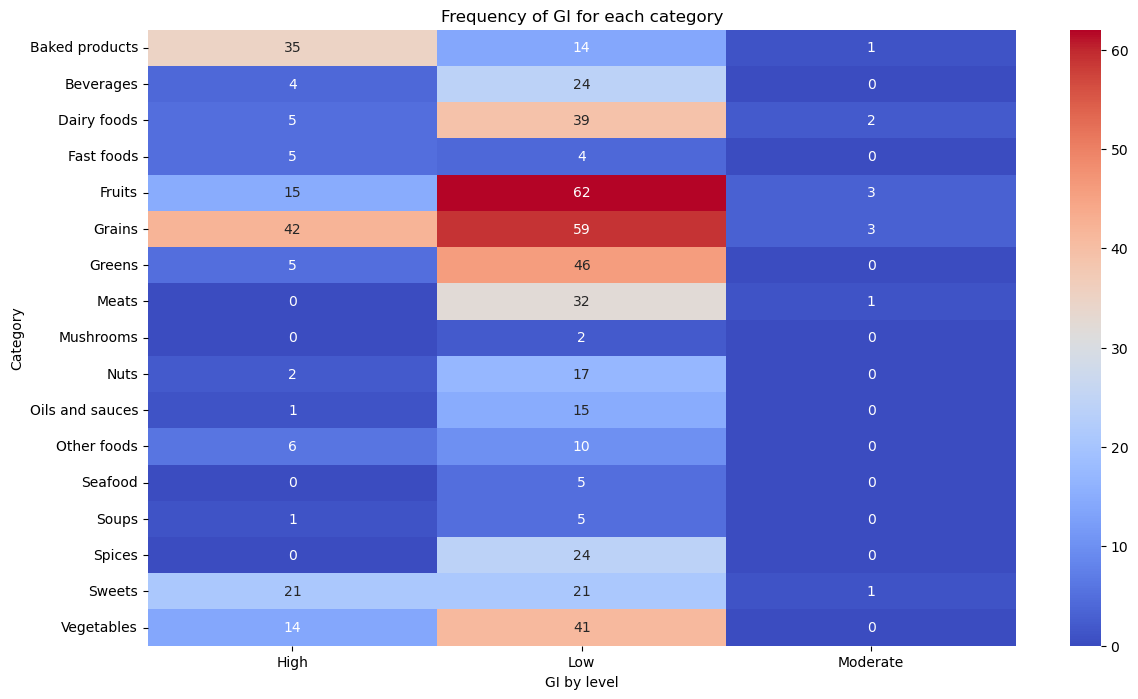

In [76]:
pivot_table = df_all_categories.pivot_table(index='Category', columns='GI by level', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar=True)
plt.title("Frequency of GI for each category")
plt.xlabel("GI by level")
plt.ylabel("Category")
plt.show()

#z gpt przerobiony
#jest ok, ale nie dziala na pc

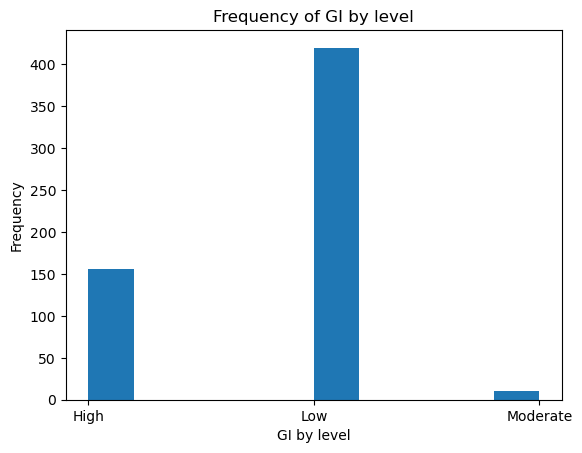

In [77]:
plt.hist(df_all_categories['GI by level'], bins=10)
plt.title('Frequency of GI by level')
plt.xlabel('GI by level')
plt.ylabel('Frequency')
plt.show()

#zmienic kolejnosc??


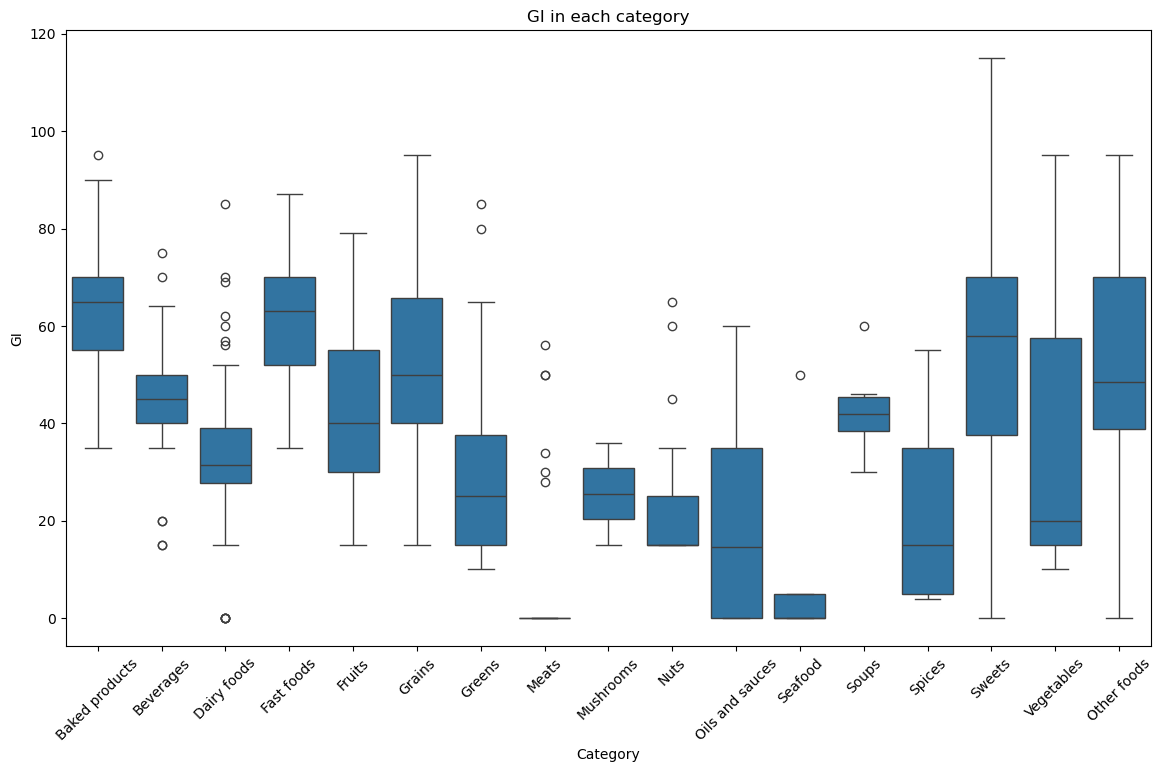

In [78]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_all_categories, x='Category', y='GI')
plt.xticks(rotation=45)
plt.title('GI in each category')
plt.xlabel('Category')
plt.ylabel('GI')
plt.show()

#git


In [79]:
# Mapowanie wartości tekstowych na liczbowe
#df_all_categories_hm = df_all_categories
#df_all_categories_hm['GI by level'] = df_all_categories_hm['GI by level'].map({'Low': 0, 'Moderate': 1, 'High': 2})
#df_all_categories_hm['GL by level'] = df_all_categories_hm['GI by level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

In [80]:
#df_all_categories_hm

In [81]:
#df_all_categories_hm['GI by level']
#df_all_categories_hm['GL by level']

In [181]:
top10_GI_all = df_all_categories.nlargest(8, 'GI')
top10_GL_all = df_all_categories.nlargest(8, 'GL')

top10GI_and_GL_all = pd.concat([top10_GI_all, top10_GL_all]).drop_duplicates()

In [183]:
top10GI_and_GL_all

,Name,GI,GL,GI by level,GL by level,Category
484,Corn Syrup (Dark),115,89.2,High,High,Sweets
477,Glucose (Dextrose),100,95.0,High,High,Sweets
498,Glucose syrup,100,70.5,High,High,Sweets
501,Wheat syrup,100,78.0,High,High,Sweets
502,Rice Syrup,100,77.0,High,High,Sweets
476,Glucose,96,94.1,High,High,Sweets
0,Baguette (white),95,46.5,High,High,Baked products
227,Potato flour (starch),95,78.9,High,High,Grains
573,Maltodextrin,95,94.0,High,High,Other foods
494,Air rice (analogue of popcorn),85,76.3,High,High,Sweets


In [185]:
top10GI_and_GL_all.index

Index([484, 477, 498, 501, 502, 476, 0, 227, 573, 494], dtype='int64')

In [187]:
top10GI_and_GL_all = top10GI_and_GL_all.sort_values(by=['GI', 'GL'], ascending=[False, False])
top10GI_and_GL_all = top10GI_and_GL_all.reset_index(drop=True)
top10GI_and_GL_all.index = top10GI_and_GL_all.index + 1
top10GI_and_GL_all

,Name,GI,GL,GI by level,GL by level,Category
1,Corn Syrup (Dark),115,89.2,High,High,Sweets
2,Glucose (Dextrose),100,95.0,High,High,Sweets
3,Wheat syrup,100,78.0,High,High,Sweets
4,Rice Syrup,100,77.0,High,High,Sweets
5,Glucose syrup,100,70.5,High,High,Sweets
6,Glucose,96,94.1,High,High,Sweets
7,Maltodextrin,95,94.0,High,High,Other foods
8,Potato flour (starch),95,78.9,High,High,Grains
9,Baguette (white),95,46.5,High,High,Baked products
10,Air rice (analogue of popcorn),85,76.3,High,High,Sweets


In [197]:
bottom10_GI_all = df_all_categories.nsmallest(7, 'GI')
bottom10_GL_all = df_all_categories.nsmallest(7, 'GL')

bottom10GI_and_GL_all = pd.concat([bottom10_GI_all, bottom10_GL_all]).drop_duplicates()

In [199]:
bottom10GI_and_GL_all = bottom10GI_and_GL_all.sort_values(by=['GI', 'GL'], ascending=[True, True])
bottom10GI_and_GL_all = bottom10GI_and_GL_all.reset_index(drop=True)
bottom10GI_and_GL_all.index = bottom10GI_and_GL_all.index + 1
bottom10GI_and_GL_all

,Name,GI,GL,GI by level,GL by level,Category
1,Cream,0,0.0,Low,Low,Dairy foods
2,Cream (30%),0,0.0,Low,Low,Dairy foods
3,Sour cream,0,0.0,Low,Low,Dairy foods
4,"Cheese (Mozzarella, pressed cottage cheese, etc.)",0,0.0,Low,Low,Dairy foods
5,Cheddar,0,0.0,Low,Low,Dairy foods
6,Mutton (Lamb),0,0.0,Low,Low,Meats
7,Boiled lamb,0,0.0,Low,Low,Meats
8,Kefir low-fat,25,0.0,Low,Low,Dairy foods
9,Apple cider (brut),40,0.0,Low,Low,Beverages
10,Red beet juice,64,0.0,High,Low,Beverages
